# Data Cleaning and Correlation Analysis in Python 
inspired by Alex the Analyst

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #adjusts the configuration of the plots

### Load and Explore Data

In [2]:
# read in data
df = pd.read_csv("./movies.csv")

In [4]:
# look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# look at the datatypes
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
# check for missing data
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


### Handling Missing Values


In [9]:
# replace NaNs where datatype = object with None
# replace NaNs where datatype is numeric (float/ int) with mean

transformed_df = df

for col in transformed_df.columns:
    if transformed_df[col].dtype == object:
        transformed_df[col].fillna('None', inplace = True)
    else:
        transformed_df[col].fillna(transformed_df[col].mean(), inplace = True)


In [10]:
# check that replacements were successful
for col in transformed_df.columns:
    percent_missing = np.mean(transformed_df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [11]:
transformed_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Datatype transformations

In [14]:
# transform datatype of budget and gross column
transformed_df['budget'] = transformed_df['budget'].astype('int64')
transformed_df['gross'] = transformed_df['gross'].astype('int64')

In [15]:
# extracting the correct year
transformed_df['yearcorrect'] = transformed_df['released'].str.extract(pat='([0-9]{4})').astype(str)
transformed_df['yearcorrect'] = np.where(transformed_df['yearcorrect'] == 'nan', transformed_df['year'].astype(str), transformed_df['yearcorrect'])


In [17]:
# sort dataframe
transformed_df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,2001
7625,The Untold Story,None,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,2020
2417,Madadayo,None,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993


In [19]:
# drop any duplicates
transformed_df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.400000,9.270000e+05,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.000000,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.800000,6.500000e+04,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.000000,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.700000,1.200000e+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.000000,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.700000,2.210000e+05,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.000000,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.300000,1.080000e+05,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.000000,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,None,Drama,2020,"October 23, 2020 (United States)",3.100000,1.800000e+01,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,None,90.000000,2020
7664,Dream Round,None,Comedy,2020,"February 7, 2020 (United States)",4.700000,3.600000e+01,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.000000,2020
7665,Saving Mbango,None,Drama,2020,"April 27, 2020 (Cameroon)",5.700000,2.900000e+01,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,107.261613,2020
7666,It's Just Us,None,Drama,2020,"October 1, 2020 (United States)",6.390411,8.810850e+04,James Randall,James Randall,Christina Roz,United States,15000,78500541,None,120.000000,2020


### Explore Correlations

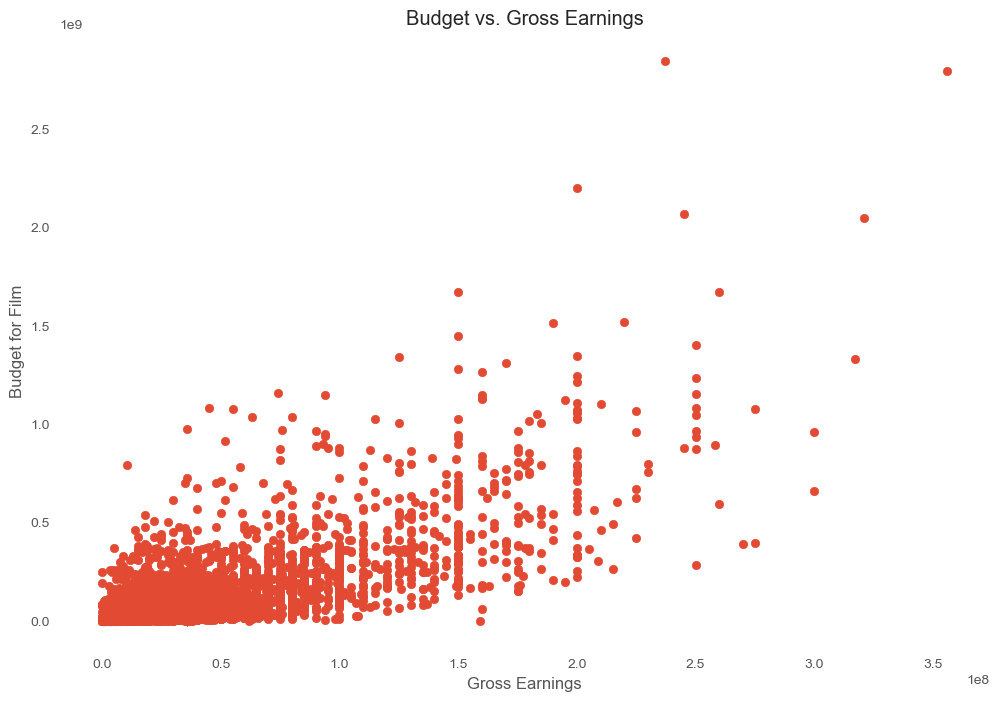

In [23]:
# scatter plot with budget vs. gross

plt.scatter(x=transformed_df['budget'], y=transformed_df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

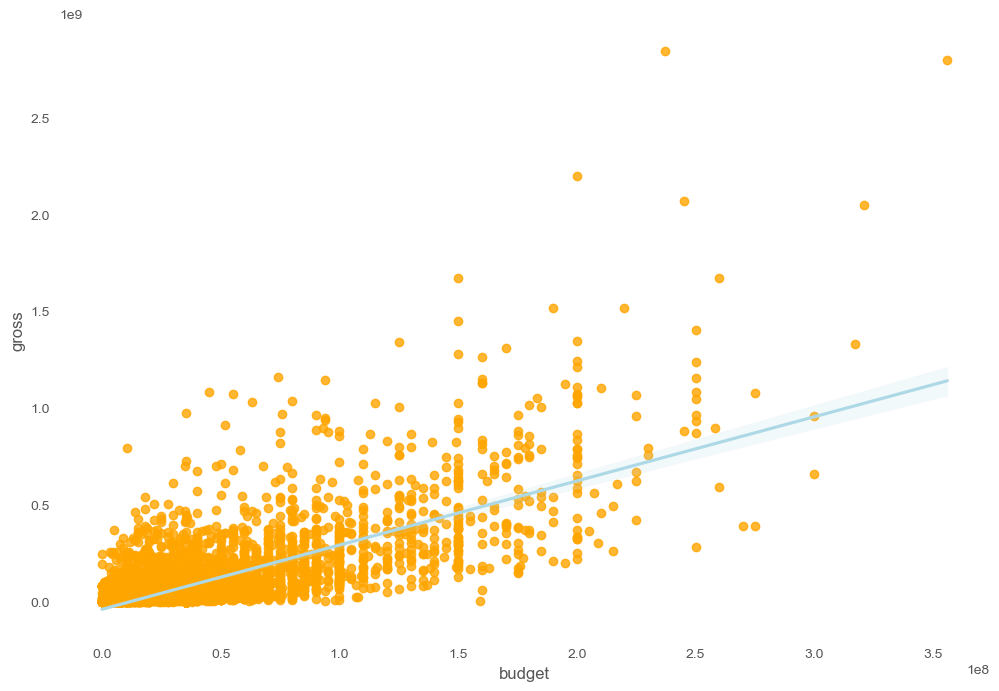

In [27]:
# regression plot for budget vs. gross

sns.regplot(x='budget', y='gross', data = transformed_df, scatter_kws={'color':'orange'}, line_kws={'color': 'lightblue'})

In [45]:
# investigate at correlations
correlation_matrix=transformed_df.corr(numeric_only=True, method= 'pearson') #pearson, kendall, spearman; default = pearson
#high correlation between budget and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


In [48]:
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097936,0.222810,0.265578,0.252042,0.120766
score,0.097936,1.000000,0.409182,0.064541,0.182868,0.399329
votes,0.222810,0.409182,1.000000,0.421007,0.628713,0.309166
budget,0.265578,0.064541,0.421007,1.000000,0.711270,0.265287
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241335
runtime,0.120766,0.399329,0.309166,0.265287,0.241335,1.000000


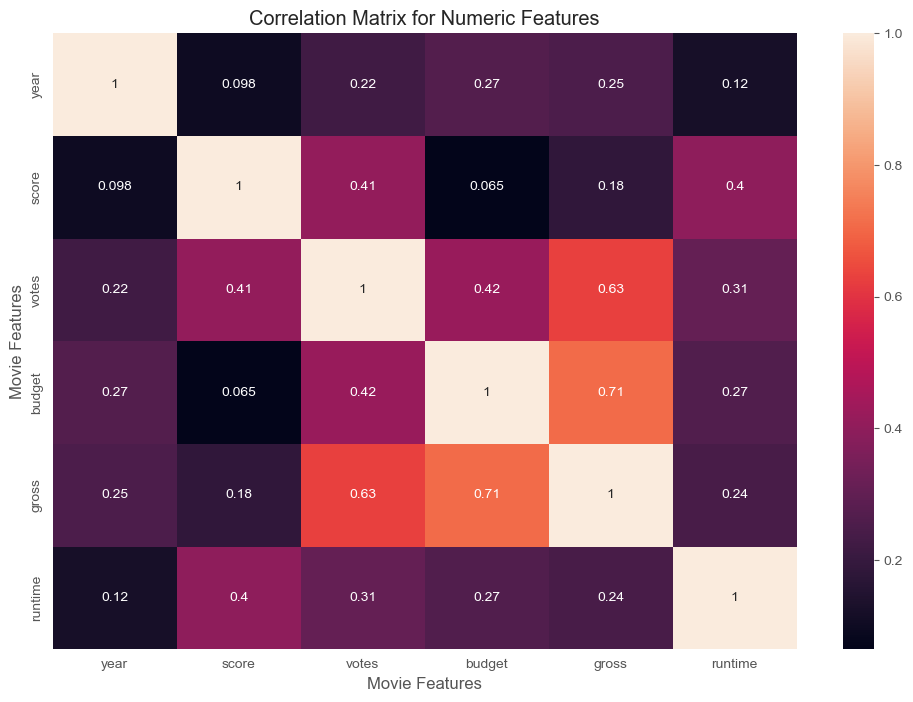

In [49]:
#create heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [50]:
#convert data of type object (s.a. strings) to numerical values
df_numerized = transformed_df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,7,6,1980,1705,8.400000,9.270000e+05,2589,4015,1047,55,19000000,46998772,2320,146.000000,0
1,5573,7,1,1980,1492,5.800000,6.500000e+04,2269,1632,327,56,4500000,58853106,731,104.000000,0
2,5142,5,0,1980,1771,8.700000,1.200000e+06,1111,2567,1745,56,18000000,538375067,1540,124.000000,0
3,286,5,4,1980,1492,7.700000,2.210000e+05,1301,2000,2247,56,3500000,83453539,1813,88.000000,0
4,1027,7,4,1980,1543,7.300000,1.080000e+05,1054,521,410,56,6000000,39846344,1778,98.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,3,6,2020,2965,3.100000,1.800000e+01,1500,2289,2422,56,7000,78500541,1738,90.000000,40
7664,1678,3,4,2020,1107,4.700000,3.600000e+01,774,2614,1886,56,35589876,78500541,539,90.000000,40
7665,4717,3,6,2020,193,5.700000,2.900000e+01,2061,2683,2041,56,58750,78500541,941,107.261613,40
7666,2843,3,6,2020,2818,6.390411,8.810850e+04,1184,1824,450,56,15000,78500541,1738,120.000000,40


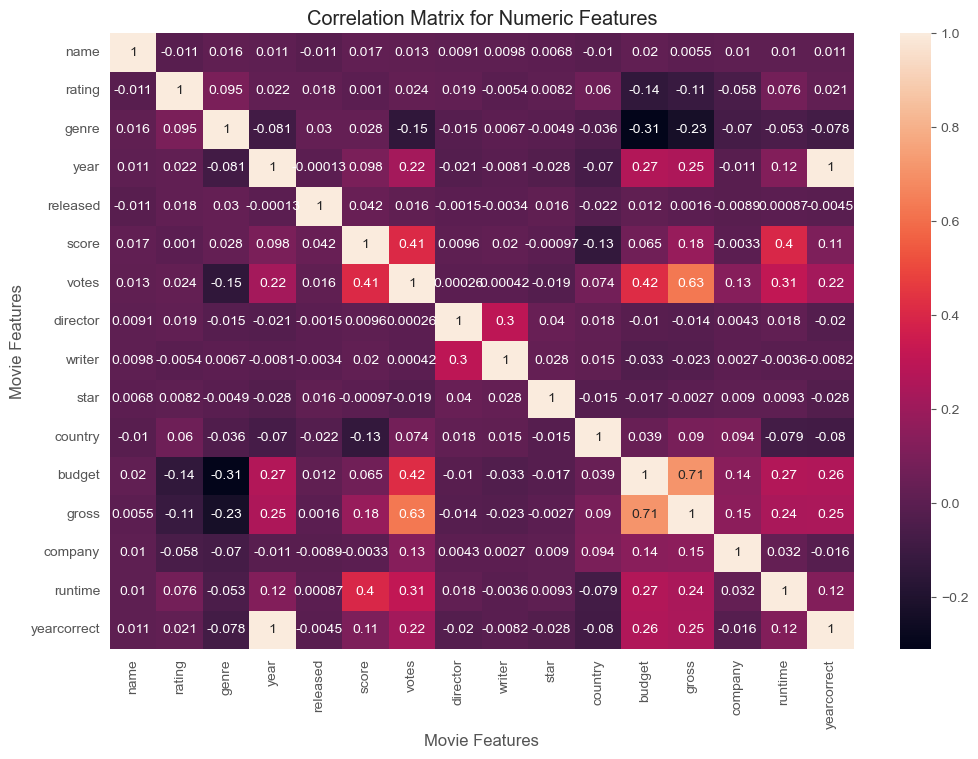

In [51]:
correlation_matrix_num=df_numerized.corr(numeric_only=True, method= 'pearson')
sns.heatmap(correlation_matrix_num, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [55]:
# pairwise correlations
corr_pairs = correlation_matrix_num.unstack()
corr_pairs

name         name           1.000000
             rating        -0.011237
             genre          0.016355
             year           0.011453
             released      -0.010703
                              ...   
yearcorrect  budget         0.259522
             gross          0.245440
             company       -0.016456
             runtime        0.120593
             yearcorrect    1.000000
Length: 256, dtype: float64

In [56]:
# sorted pairwise correlations
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.310566
budget       genre         -0.310566
gross        genre         -0.230267
genre        gross         -0.230267
votes        genre         -0.145276
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [57]:
# filter out high correlations (> 0.5)
high_corr = sorted_pairs[(sorted_pairs) > .5]
high_corr
# votes and budget have the highest correlation with gross earnings

gross        votes          0.628713
votes        gross          0.628713
budget       gross          0.711270
gross        budget         0.711270
yearcorrect  year           0.997416
year         yearcorrect    0.997416
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64